### Summary

1. Bubble Sort: Simple but inefficient for large datasets.
2. Merge Sort: Efficient and stable, but requires additional space.
3. Quicksort: Efficient on average, but can degrade to quadratic time in worst-case scenarios.


- Space Complexity: Measures the extra space required by the algorithm beyond the input data.
- Asymptotic Notation: Provides a way to analyze algorithm performance as input size grows.


#### Choosing the Right Algorithm:

- The choice of sorting algorithm depends on various factors:

    - Input data size: For small datasets, simpler algorithms like bubble sort or insertion sort might be sufficient. For larger datasets, more efficient algorithms like merge sort or quicksort are preferred.
    - Data distribution: If the data is almost sorted, some algorithms might perform better than others.
    - Memory constraints: If memory is limited, in-place algorithms like quicksort might be a better choice.
    - Stability: If the relative order of equal elements needs to be preserved, stable algorithms like merge sort are preferred

![Screenshot 2024-10-30 at 2.51.47 AM.png](<attachment:Screenshot 2024-10-30 at 2.51.47 AM.png>)
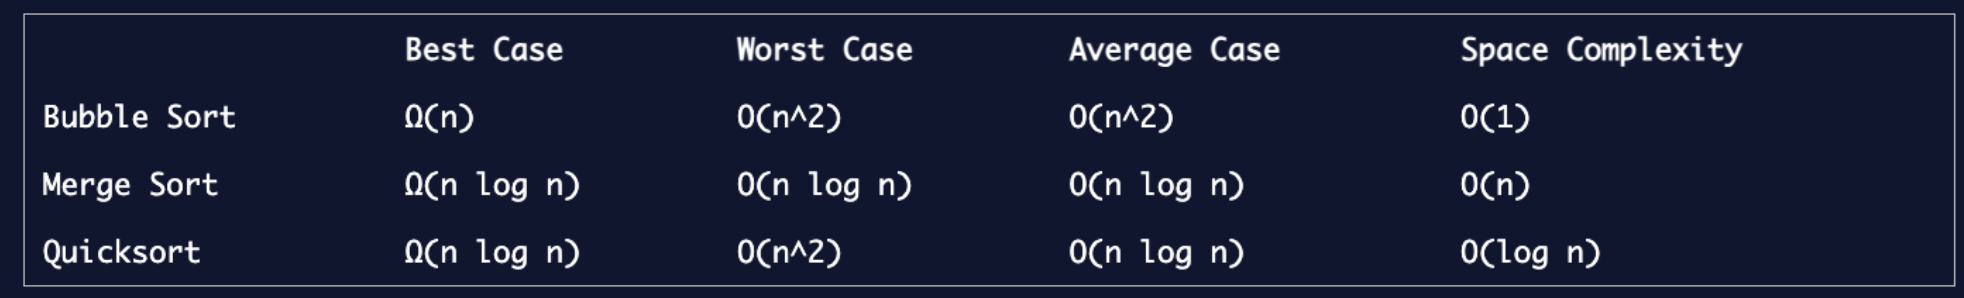

### 1. Bubble Sort
- algo to sort items in original list in ascending or descending order by comparing items next to each other (n, n+1)
- Modifies the original list, not creating a new one.

#### How it works:
1) Compares adjacent elements in a list.
2) Swaps elements if they are out of order.
3) Repeats this process until the list is sorted.


#### Time Complexity:
- Worst-case: O(n^2) - Occurs when the list is in reverse order.
- Best-case: O(n) - Occurs when the list is already sorted.
- Average-case: O(n^2)


#### Key Points:
- Simple to understand and implement.
- Inefficient for large datasets due to its quadratic time complexity.
- Useful for educational purposes and small datasets.
- Can be modified to sort in ascending or descending order.


#### Improvements:
- Optimized Bubble Sort: Can be optimized by keeping track of whether any swaps occurred in a pass. If no swaps occur, the list is sorted.
- Other Sorting Algorithms: More efficient algorithms like Merge Sort, Quick Sort, and Heap Sort have better time complexities for larger datasets.


![Screenshot 2024-10-30 at 12.53.06 AM.png](<attachment:Screenshot 2024-10-30 at 12.53.06 AM.png>)
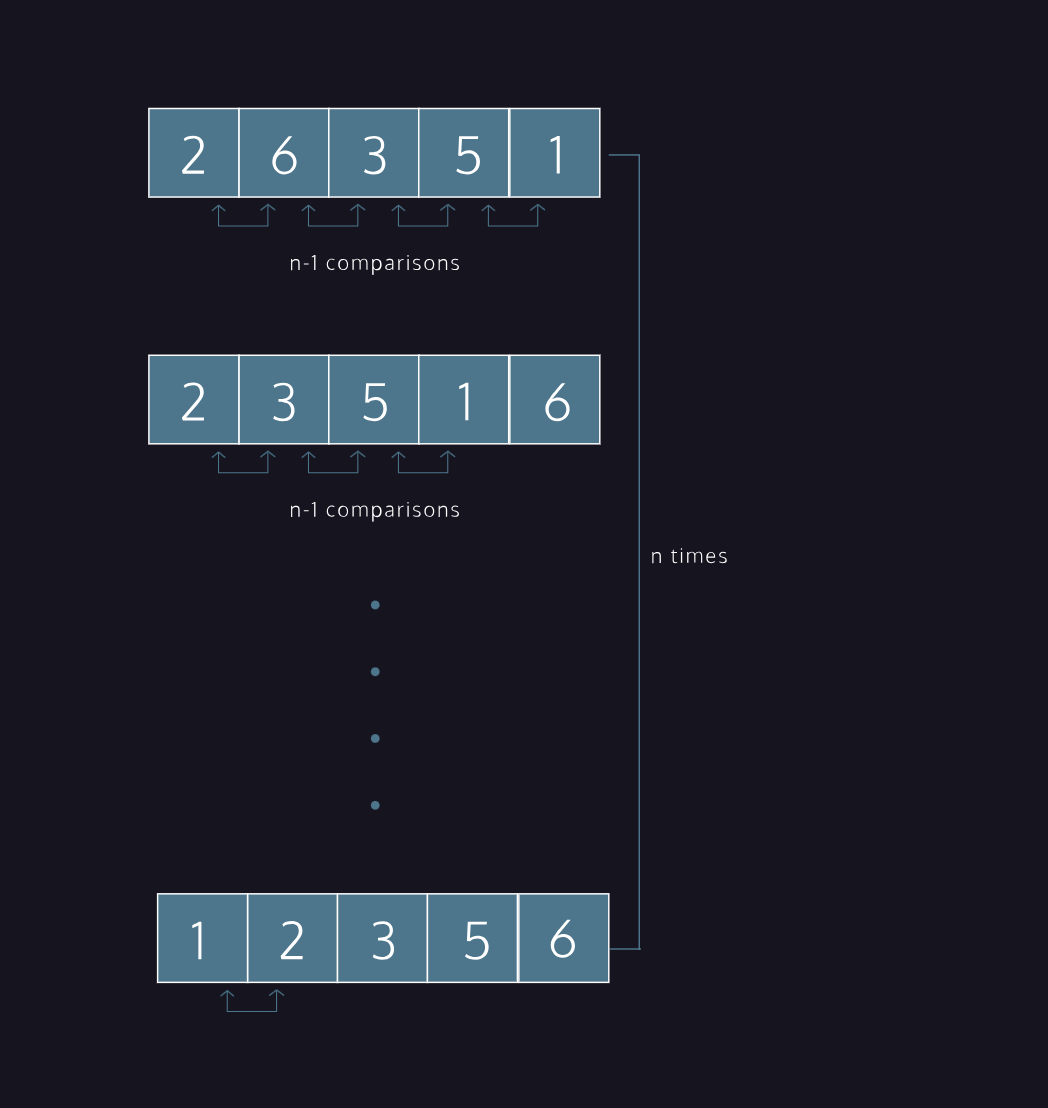

In [1]:
# 1) swap the items in the array

nums = [5, 2, 9, 1, 5, 6]

def swap(arr, index_1, index_2):
  temp = arr[index_1]
  arr[index_1] = arr[index_2]
  arr[index_2] = temp

swap(nums, 3, 5)
print(nums)

[5, 2, 9, 6, 5, 1]


In [2]:
# 2) simple comparison without optimization

nums = [5, 2, 9, 1, 5, 6]

def bubble_sort(arr):
  for el in arr:
    for index in range(len(arr) - 1):
      if arr[index] > arr[index + 1]:
        swap(arr, index, index + 1)


print("Pre-Sort: {0}".format(nums))
 
bubble_sort(nums)
print("Post-Sort: {0}".format(nums))

Pre-Sort: [5, 2, 9, 1, 5, 6]
Post-Sort: [1, 2, 5, 5, 6, 9]


##### Optimize bubble sort algo

- Problem: Standard Bubble Sort makes unnecessary comparisons in later passes 
    - majority of the items is already place in their correct positions - but still compare them one by one

- Solution: Optimized version skips such unnecessary comparisons

- Benefit:
    - Reduces the number of comparisons and swap in the inner loop
    - Time complexity remains O(n^2)
        - The optimization do NOT change the fundamental quadratic nature of the algorithm where we need to iterate all the items in list

In [3]:
# 3) comparison with optimization

nums = [9, 8, 7, 6, 5, 4, 3, 2, 1]
print("PRE SORT: {0}".format(nums))


def bubble_sort_unoptimized(arr):
  iteration_count = 0

  for el in arr:
    for index in range(len(arr) - 1):
      iteration_count += 1

      if arr[index] > arr[index + 1]:
        swap(arr, index, index + 1)
        
  print("PRE-OPTIMIZED ITERATION COUNT: {0}".format(iteration_count))



def bubble_sort(arr):
  iteration_count = 0

  for i in range(len(arr)):
    for idx in range(len(arr) - i - 1): # <- this line = micro-optimization by reducing iterations in the inner loop. *As the outer loop progresses, the last i elements are already sorted, so skip the comparison

      iteration_count += 1
  
      if arr[idx] > arr[idx + 1]:
        arr[idx], arr[idx + 1] = arr[idx + 1], arr[idx] # not use swap func
        
  print("POST-OPTIMIZED ITERATION COUNT: {0}".format(iteration_count))

bubble_sort_unoptimized(nums.copy())
bubble_sort(nums)
print("POST SORT: {0}".format(nums))

bubble_sort_unoptimized(nums.copy())
bubble_sort(nums)
print("POST SORT: {0}".format(nums))

PRE SORT: [9, 8, 7, 6, 5, 4, 3, 2, 1]
PRE-OPTIMIZED ITERATION COUNT: 72
POST-OPTIMIZED ITERATION COUNT: 36
POST SORT: [1, 2, 3, 4, 5, 6, 7, 8, 9]
PRE-OPTIMIZED ITERATION COUNT: 72
POST-OPTIMIZED ITERATION COUNT: 36
POST SORT: [1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2. Merge Sort
- Stable sorting algorithm: Preserves the relative order of equal elements.
- Efficient for large datasets, but less efficient for small datasets compared to simpler algorithms like insertion sort or bubble sort.
- Widely used in various applications, including external sorting and parallel sorting.

#### Divide and Conquer:
- Breaks down the list into smaller sublists.
- Recursively sorts each sublist.
- Merges the sorted sublists to form the final sorted list.

![Screenshot 2024-10-30 at 1.18.50 AM.png](<attachment:Screenshot 2024-10-30 at 1.18.50 AM.png>)



#### Merge Process:
1) Compares the first elements of two sorted sublists.
2) Adds the smaller element to the merged list.
3) Repeats the process until one sublist is empty.
4) Appends the remaining elements of the non-empty sublist to the merged list.

![Screenshot 2024-10-30 at 1.20.10 AM.png](<attachment:Screenshot 2024-10-30 at 1.20.10 AM.png>)



#### Time Complexity:
- Best-case, worst-case, and average-case: O(n log n)
- Efficient for large datasets.


#### Space Complexity:
- O(n) - Requires additional space for merging sublists.


![Screenshot 2024-10-30 at 1.20.42 AM.png](<attachment:Screenshot 2024-10-30 at 1.20.42 AM.png>)
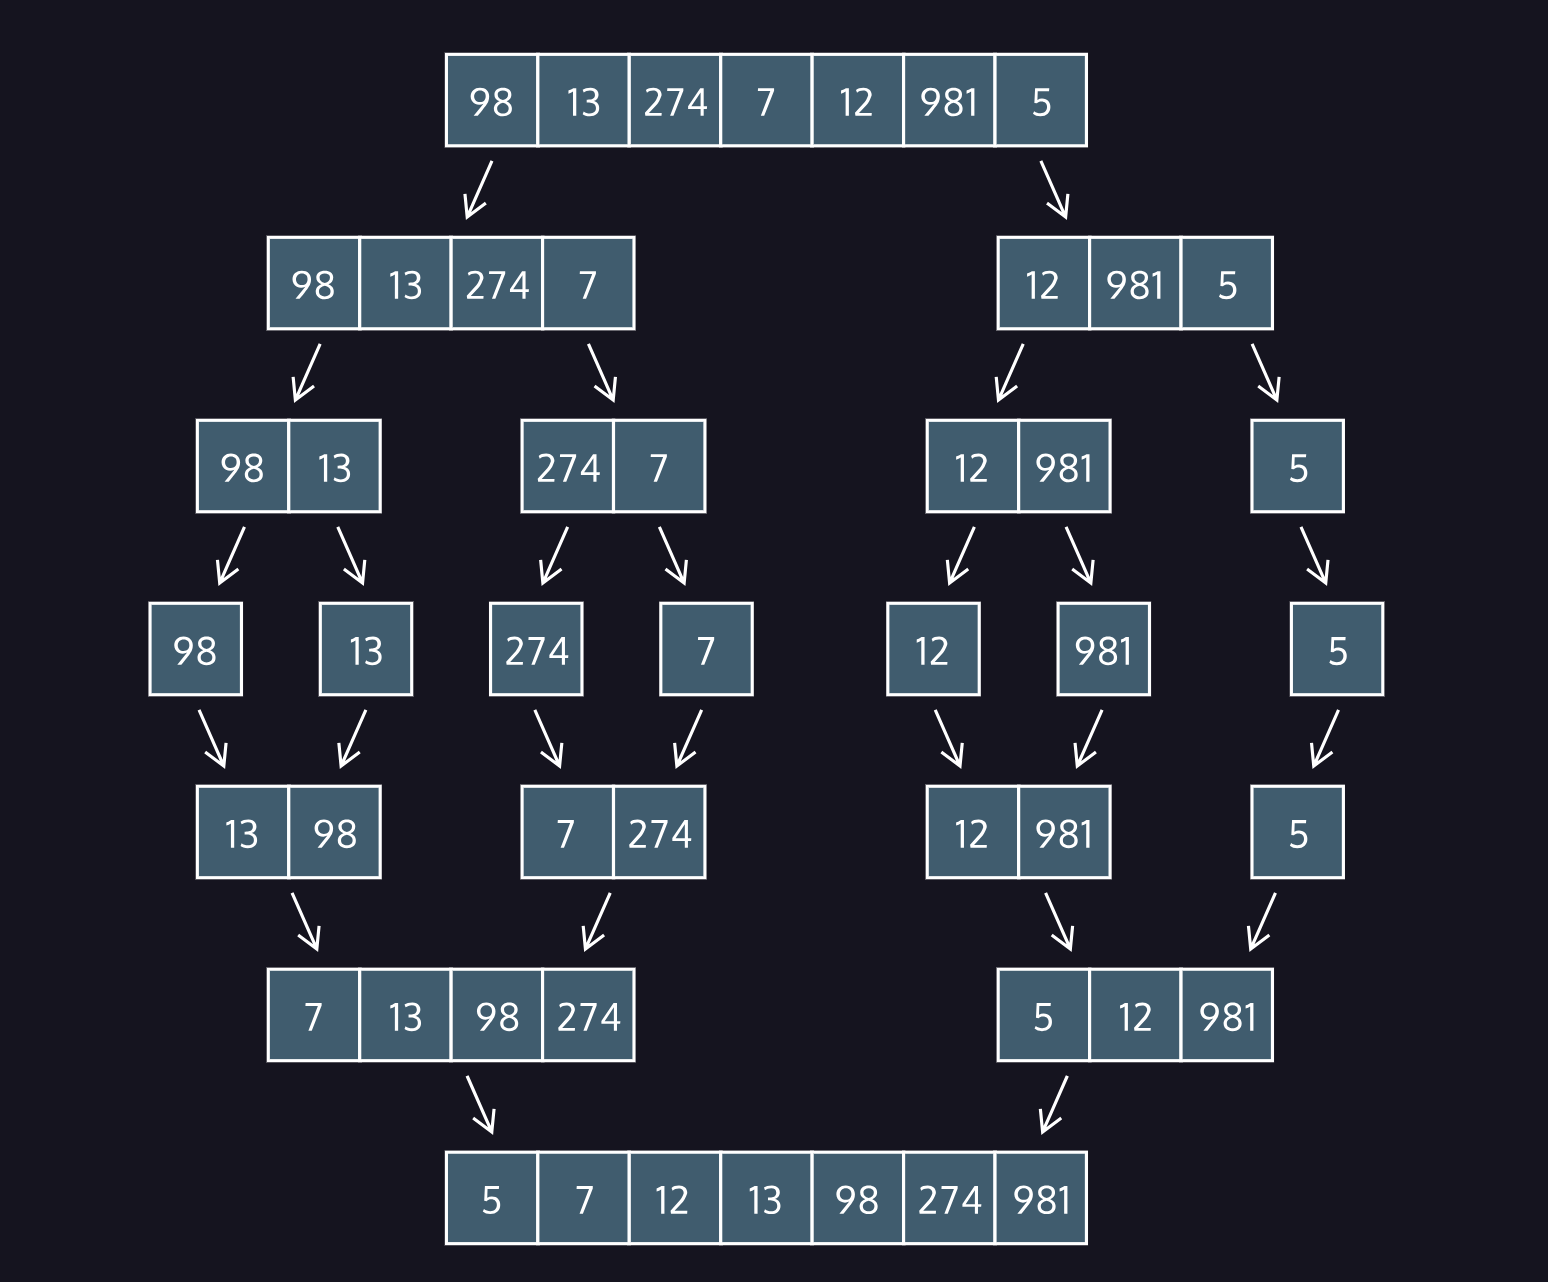
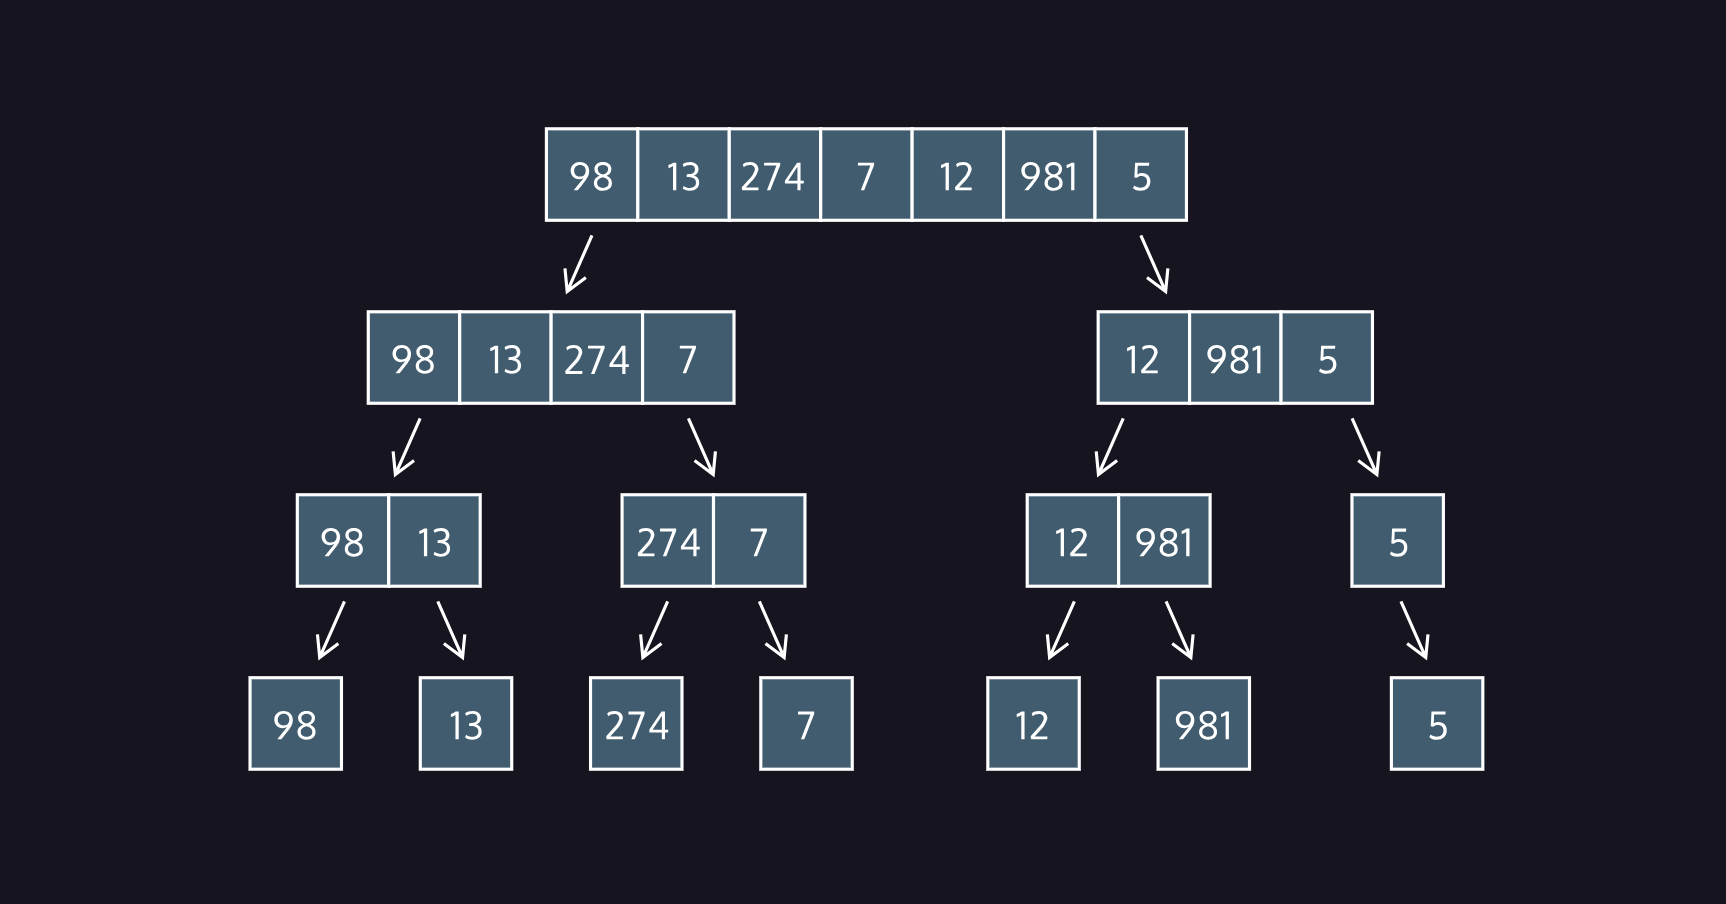
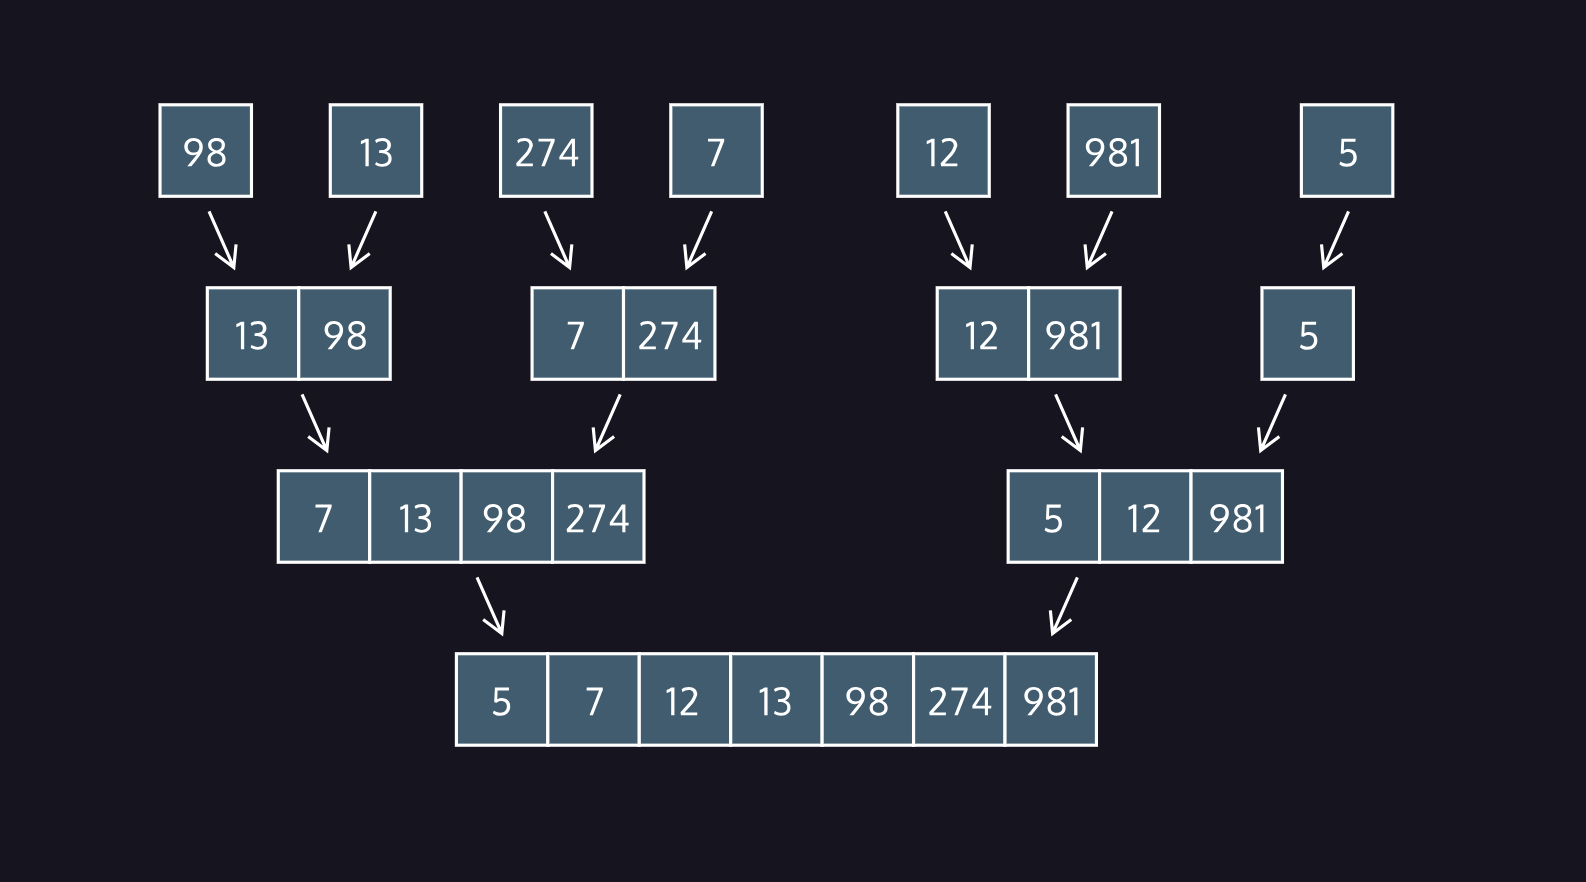

In [4]:
def merge(left, right):
  result = []

  while (left and right):
    if left[0] < right[0]:
      result.append(left[0])
      left.pop(0)
    else:
      result.append(right[0])
      right.pop(0)

   # merge results
  if left:
    result += left
  if right:
    result += right

  return result


def merge_sort(items):
  """
  1. divides the input list [15, 3, 9] into two sublists:
    left_split = [15]
    right_split = [3, 9]

  2. recursively calls merge_sort() on both sublists:
    merge_sort([15]) returns [15]
    merge_sort([3, 9]) further divides and merges to return [3, 9]

  3. merge the sorted sublists [15] and [3, 9] to produce the final sorted list [3, 9, 15]
  """
  
  if len(items) <= 1:
    return items

  middle_index = len(items) // 2
  left_split = items[:middle_index]
  right_split = items[middle_index:]

  left_sorted = merge_sort(left_split)
  right_sorted = merge_sort(right_split)

  return merge(left_sorted, right_sorted)


unordered_list1 = [356, 746, 264, 569, 949, 895, 125, 455]
unordered_list2 = [787, 677, 391, 318, 543, 717, 180, 113, 795, 19, 202, 534, 201, 370, 276, 975, 403, 624, 770, 595, 571, 268, 373]
unordered_list3 = [860, 380, 151, 585, 743, 542, 147, 820, 439, 865, 924, 387]

ordered_list1 = merge_sort(unordered_list1)
ordered_list2 = merge_sort(unordered_list2)
ordered_list3 = merge_sort(unordered_list3)

print(ordered_list1)
print(ordered_list2)
print(ordered_list3)

[125, 264, 356, 455, 569, 746, 895, 949]


[19, 113, 180, 201, 202, 268, 276, 318, 370, 373, 391, 403, 534, 543, 571, 595, 624, 677, 717, 770, 787, 795, 975]
[147, 151, 380, 387, 439, 542, 585, 743, 820, 860, 865, 924]


### 3. Quicksort
- a sorting algo efficient for large datasets.
- leverage in-place sorting:
    - values are swapped within the original list, and no additional memory is used.
    - the sorting process happens directly on the input array, without creating any additional data structures

- The elements are rearranged within the array itself, making it an efficient use of memory.

#### Divide and Conquer:
1) Pivot Selection: Chooses a pivot element from the array.
2) Partitioning: Divides the array into two subarrays:
    - Elements less than the pivot
    - Elements greater than the pivot
3) Recursive Calls: Recursively applies the same process to each subarray.

- Base Case: If a subarray has one or fewer elements, it's already sorted.


#### Time Complexity:
- Best-case and Average-case: O(n log n)
- Worst-case: O(n^2) (occurs when the pivot consistently divides the array unevenly)


#### Key Points:
- Pivot selection strategy significantly impacts performance.
- Common pivot selection strategies:
    - Random pivot
    - Median-of-three pivot
- Can be optimized with techniques like randomized quicksort and three-way partitioning.


![Screenshot 2024-10-30 at 1.46.06 AM.png](<attachment:Screenshot 2024-10-30 at 1.46.06 AM.png>)
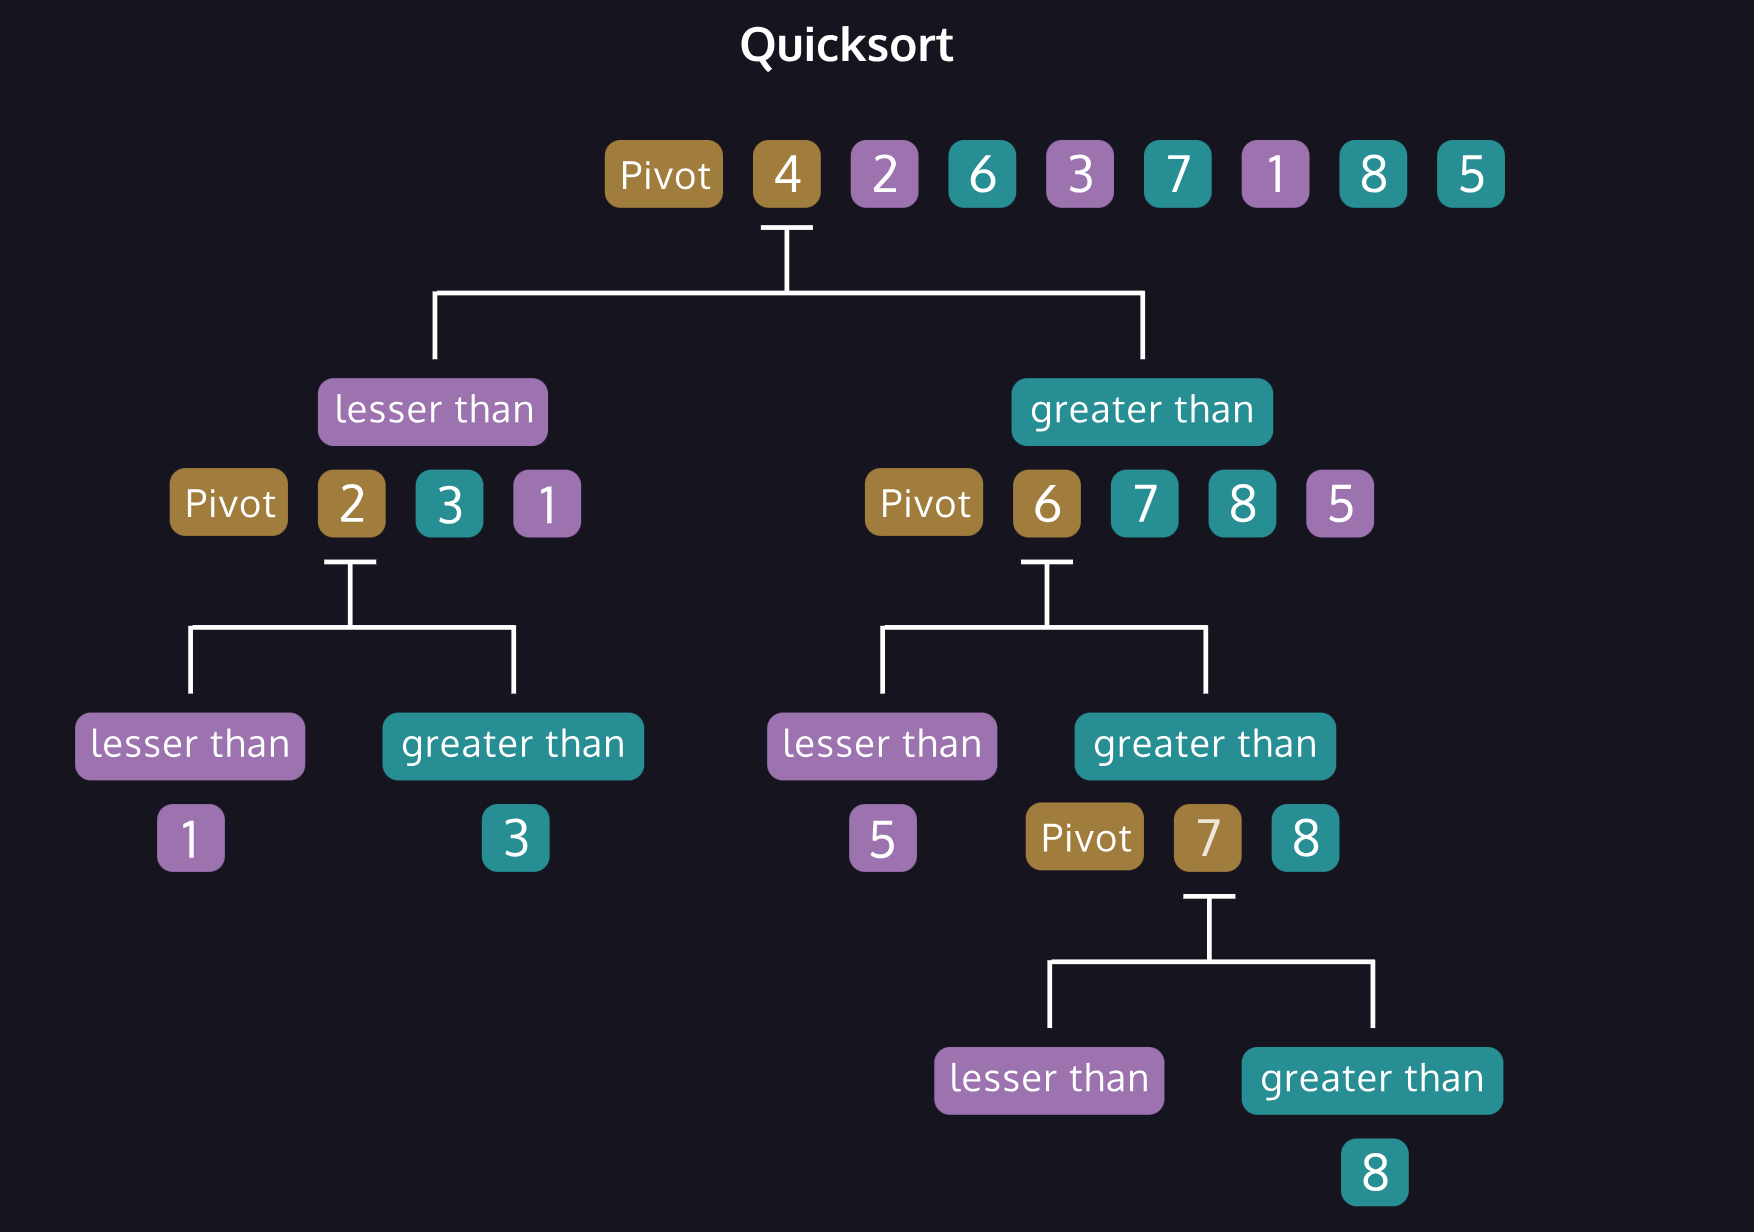

In [5]:
from random import randrange, shuffle

def quicksort(list, start, end):
  """
  Run quicksort on the list
  """

  if start >= end:
    return
  
  # 1. select random element to be a pivot and swap it with the last elemet in the sub-lists: list[end]
  pivot_idx = randrange(start, end + 1)
  pivot_element = list[pivot_idx]
  list[end], list[pivot_idx] = list[pivot_idx], list[end]


  less_than_pointer = start

  # 3. track all elements lesser than pivot element and swap
  for i in range(start, end):
    if list[i] < pivot_element:  # check if the portion of the list between start and end contains one or less elements
      list[i], list[less_than_pointer] = list[less_than_pointer], list[i]
      less_than_pointer += 1

  # move the pivot element into the correct placement within the list.
  list[end], list[less_than_pointer] = list[less_than_pointer], list[end]
  print("{0} successfully partitioned".format(list[start: end + 1]))


  # recursively call quicksort on the “lesser than” and “greater than” sub-lists created from the partition
  quicksort(list, start, less_than_pointer - 1)
  quicksort(list, less_than_pointer + 1, end)

  
list = [5,3,1,7,4,6,2,8]
shuffle(list)

print("PRE SORT: ", list)
print(quicksort(list, 0, len(list) -1))
print("POST SORT: ", list)

PRE SORT:  [1, 3, 8, 5, 6, 2, 7, 4]
[1, 3, 4, 2, 5, 8, 7, 6] successfully partitioned
[1, 2, 4, 3] successfully partitioned
[3, 4] successfully partitioned
[6, 7, 8] successfully partitioned
[6, 7] successfully partitioned
None
POST SORT:  [1, 2, 3, 4, 5, 6, 7, 8]


In [6]:
# Cf. Case not using in-place implementation of the quicksort algorithm
def qs(arr):
  if len(arr) <= 1:
    return arr

  smaller = [] # creating a new list (not using the original one: arr)
  larger = []
  
  pivot = 0
  pivot_element = arr[pivot]
  
  for i in range(1, len(arr)):
    if arr[i] > pivot_element:
      larger.append(arr[i])
    else:
      smaller.append(arr[i])

  sorted_smaller = qs(smaller)
  sorted_larger = qs(larger)

  return sorted_smaller + [pivot_element] + sorted_larger
